C:\Users\DBTECH AFRICA\AppData\Local\Temp\ipykernel_35908\1553529144.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


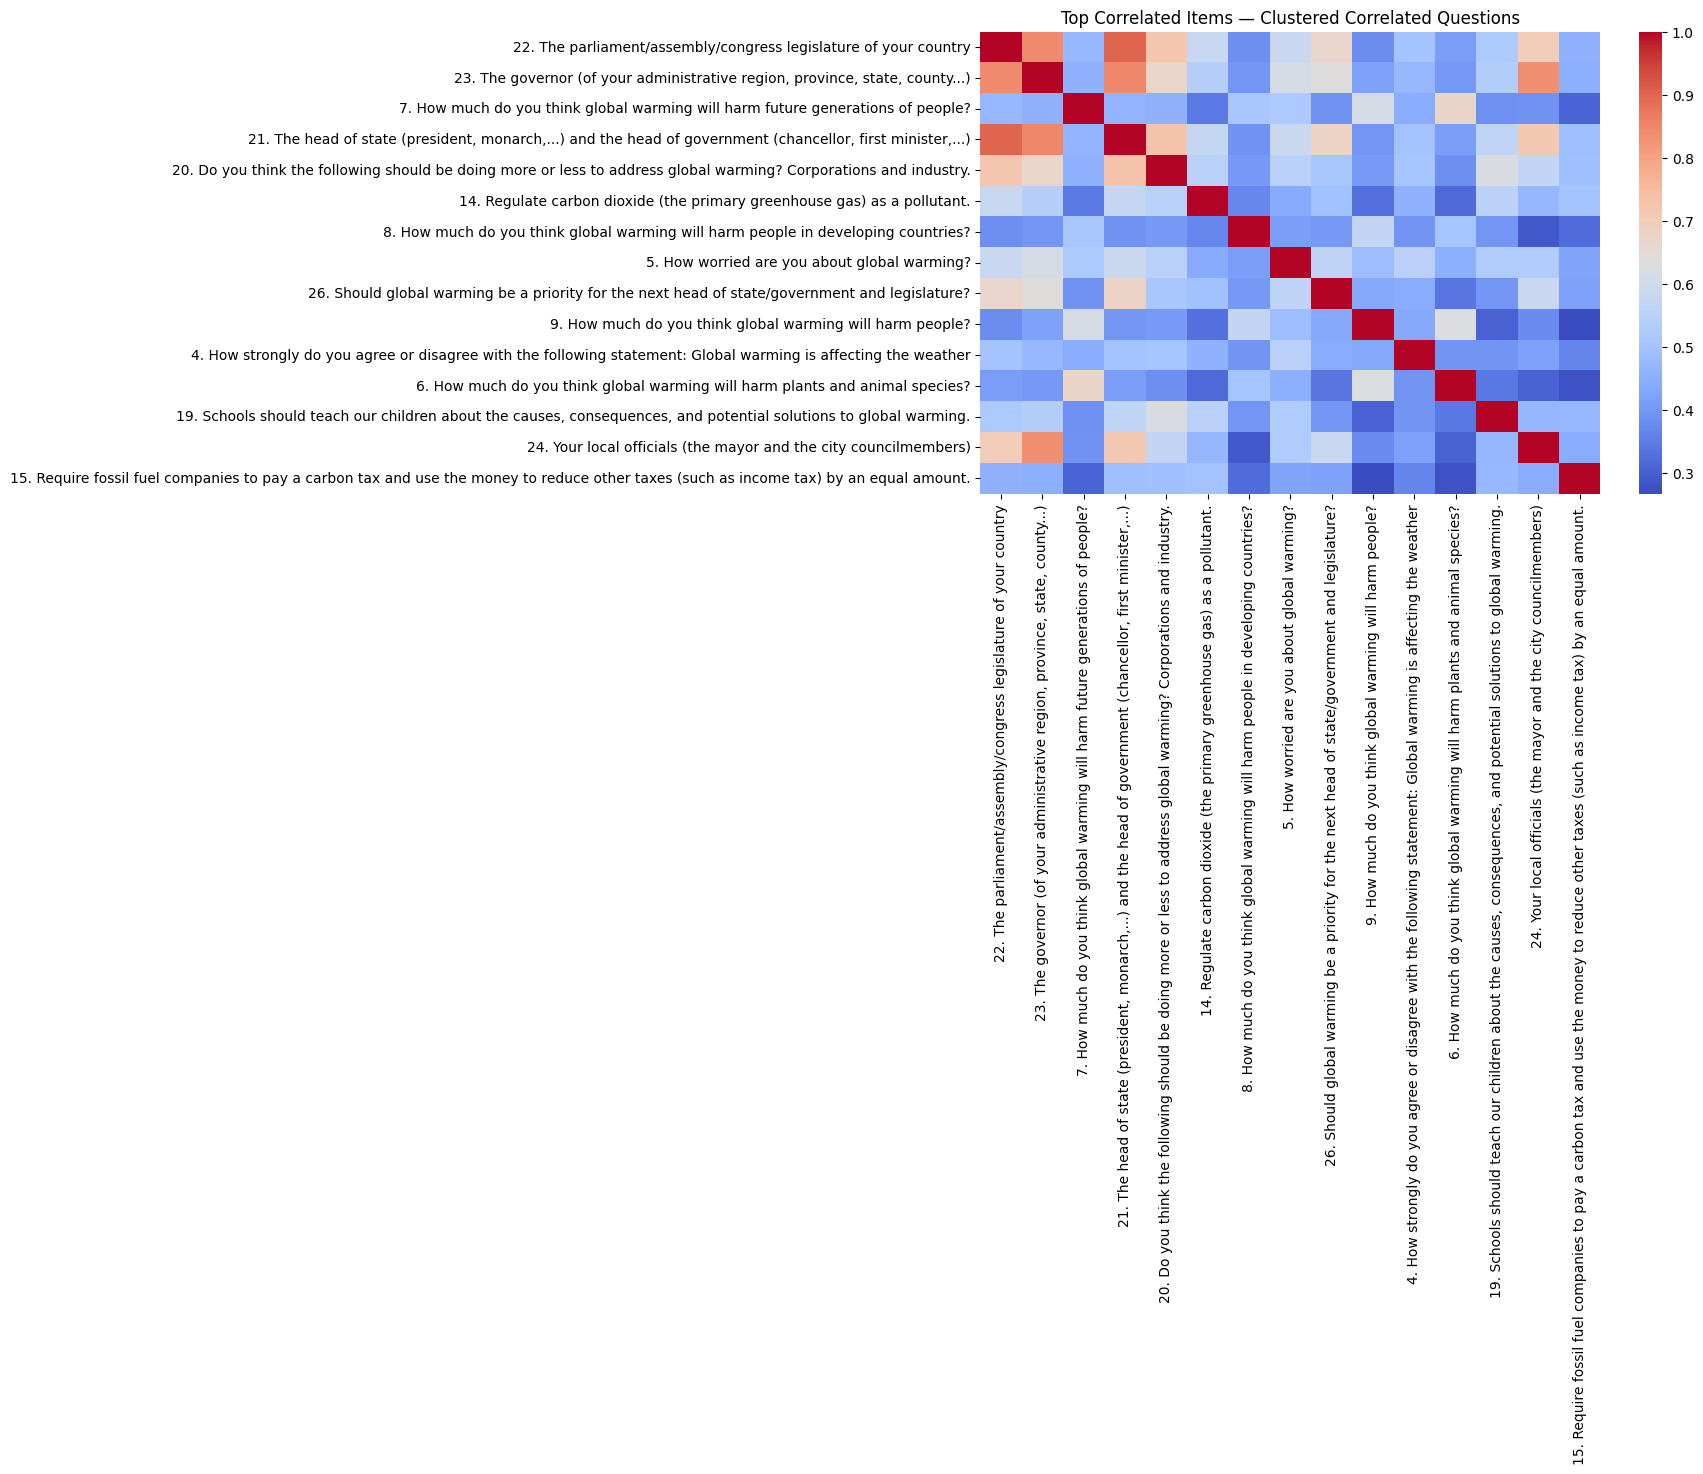

Top correlated questions with cluster labels:
                                                    Correlation  \
22. The parliament/assembly/congress legislatur...     0.642241   
23. The governor (of your administrative region...     0.640280   
7. How much do you think global warming will ha...     0.621685   
21. The head of state (president, monarch,...) ...     0.620981   
20. Do you think the following should be doing ...     0.593589   
14. Regulate carbon dioxide (the primary greenh...     0.588520   
8. How much do you think global warming will ha...     0.583235   
5. How worried are you about global warming?           0.569434   
26. Should global warming be a priority for the...     0.562482   
9. How much do you think global warming will ha...     0.548399   
4. How strongly do you agree or disagree with t...     0.541204   
6. How much do you think global warming will ha...     0.530914   
19. Schools should teach our children about the...     0.524356   
24. Your local o

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# STEP 1 — Load the encoded dataset
df = pd.read_excel("fully_encoded_dataset_complete.xlsx")

# STEP 2 — Select only Likert-scale columns (escludi ID, anagrafica, ecc.)
likert_cols = [col for col in df.columns if df[col].dtype in [np.float64, np.int64] and df[col].nunique() > 2 and df[col].nunique() <= 7]

# STEP 3 — Drop NaNs and standardize data
likert_df = df[likert_cols].dropna()
X = StandardScaler().fit_transform(likert_df)

# STEP 4 — Run KMeans clustering (assume k=2 from previous Elbow/Silhouette)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
likert_df['Cluster'] = kmeans_labels

# STEP 5 — Calculate correlation (point biserial) between each item and cluster
def point_biserial_corr(col, labels):
    return np.corrcoef(col, labels)[0, 1] if len(np.unique(labels)) == 2 else np.nan

correlations = {
    col: point_biserial_corr(likert_df[col], likert_df['Cluster']) for col in likert_cols
}

# STEP 6 — Convert to DataFrame and sort by absolute correlation
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_df['AbsCorrelation'] = correlation_df['Correlation'].abs()
correlation_df_sorted = correlation_df.sort_values(by='AbsCorrelation', ascending=False)

# STEP 7 — Plot heatmap of top 15 most correlated items
top_items = correlation_df_sorted.head(15).index
plt.figure(figsize=(10, 6))
sns.heatmap(likert_df[top_items].corr(), cmap='coolwarm', annot=False)
plt.title("Top Correlated Items — Clustered Correlated Questions")
plt.tight_layout()
plt.show()

# Display top items
print("Top correlated questions with cluster labels:")
print(correlation_df_sorted.head(15))
